## Technical Assessment
#### ZNPHI Public Health Intelligence Officer – Bioinformatics & Big Data Visualization
##### Malambo Mutila |  mutilamalambo@gmail.com | +260979233231

##### Key Libraries

In [220]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import geopandas as gpd

from docx import Document
from docx.shared import Inches
from shapely.geometry import Point
from shapely.geometry import LineString
import folium

print("Done")

Done


##### Loading Data

In [221]:
maternal_deaths = pd.read_excel("data/Maternal deaths.xlsx", sheet_name=None)
measles_lab = pd.read_excel("data/measles_lab.xlsx", sheet_name=None)
weekly_data = pd.read_csv("data/weekly_data_by_province.csv")
zambian_provinces = gpd.read_file("./data/shapefiles/zmb_admbnda_adm1_dmmu_20201124.shp")

print("Data Loaded")

Data Loaded


### EDA

##### 1. Weekly Data by Province (Summaries)

In [222]:
weekly_data.head(20)

,orgUnit_name,period,AFP Confirmed,AFP Sent to Lab,AFP suspected,Anthrax confirmed,Anthrax sent to lab,Anthrax suspected,Cholera confirmed,Cholera sent to lab,...,Measles confirmed,Measles sent to lab,Measles suspected,Monkeypox sent to lab,Monkeypox suspected,Plague sent to Lab,Plague suspected,Typhoid fever confirmed,Typhoid fever sent to Lab,Typhoid fever suspected
0,ce Central Province,2024W1,0,0,0,0,0,2,8,44,...,2,6,35,0,0,0,0,0,1,1
1,lu Luapula Province,2024W1,0,0,1,0,0,0,0,0,...,0,3,86,0,0,0,0,2,4,4
2,ea Eastern Province,2024W1,0,3,3,0,0,1,9,17,...,3,3,11,0,0,0,0,0,0,0
3,ls Lusaka Province,2024W1,0,0,0,0,0,3,22,141,...,0,0,1,0,0,0,0,0,0,0
4,no Northern Province,2024W1,0,0,0,0,0,0,2,3,...,0,0,49,0,0,0,0,0,0,1
5,mu Muchinga Province,2024W1,0,0,0,0,0,0,1,3,...,0,0,3,0,0,0,0,0,0,0
6,we Western Province,2024W1,0,0,0,0,0,3,3,7,...,10,0,0,0,0,0,0,0,0,0
7,so Southern Province,2024W1,0,0,0,0,0,3,15,24,...,0,0,0,0,0,0,0,0,0,0
8,nw North-Western Province,2024W1,0,2,2,0,0,0,5,12,...,0,10,25,0,0,0,0,3,3,3
9,co Copperbelt Province,2024W1,0,0,0,0,0,0,4,5,...,0,0,0,0,0,0,0,0,7,0


In [223]:
weekly_data.dtypes

orgUnit_name                        object
period                              object
AFP Confirmed                        int64
AFP Sent to Lab                      int64
AFP suspected                        int64
Anthrax confirmed                    int64
Anthrax sent to lab                  int64
Anthrax suspected                    int64
Cholera confirmed                    int64
Cholera sent to lab                  int64
Cholera suspected                    int64
Diarrhoea Non-Bloody confirmed       int64
Diarrhoea Non-Bloody sent to lab     int64
Diarrhoea Non-Bloody suspecteded     int64
Malaria confirmed                    int64
Malaria sent to lab                  int64
Malaria suspected                    int64
Measles confirmed                    int64
Measles sent to lab                  int64
Measles suspected                    int64
Monkeypox sent to lab                int64
Monkeypox suspected                  int64
Plague sent to Lab                   int64
Plague susp

##### 1.1. Disease and Events Summary Narrative (Automated)

##### 1.1.1. Immediately Notifiable Diseases and Events

In [224]:
weekly_data_copy = weekly_data.copy()
province_name_map = {
    'ce Central Province': 'Central',
    'lu Luapula Province': 'Luapula',
    'ea Eastern Province': 'Eastern',
    'ls Lusaka Province': 'Lusaka',
    'no Northern Province': 'Northern',
    'mu Muchinga Province': 'Muchinga',
    'we Western Province': 'Western',
    'so Southern Province': 'Southern',
    'nw North-Western Province': 'North-Western',
    'co Copperbelt Province': 'Copperbelt'
}
weekly_data_copy['orgUnit_name'] = weekly_data_copy['orgUnit_name'].replace(province_name_map)

In [225]:
# Filter data for week 34
weekly_data_week_34 = weekly_data_copy[weekly_data_copy['period'] == '2024W34']

# Calculate the number of suspected cases per province for week 34
cases_summary = {}
for disease in ['AFP suspected', 'Anthrax suspected', 'Cholera suspected', 'Measles suspected']:
    cases_summary[disease] = weekly_data_week_34.groupby('orgUnit_name')[disease].sum()

    total_cases = cases_summary[disease].sum()
    provinces_with_cases = cases_summary[disease][cases_summary[disease] > 0].to_dict()

    # Generate narrative for each disease for week 34
    disease_name = disease.split()[0]
    narrative = f"• {disease_name}: {total_cases} suspected cases were reported from "
    narrative += ", ".join([f"{province} ({count})" for province, count in provinces_with_cases.items()]) + " provinces."

    print(narrative)

• AFP: 6 suspected cases were reported from Eastern (2), Southern (3), Western (1) provinces.
• Anthrax: 8 suspected cases were reported from Southern (7), Western (1) provinces.
• Cholera: 4 suspected cases were reported from Copperbelt (4) provinces.
• Measles: 28 suspected cases were reported from Eastern (7), Luapula (3), Lusaka (2), North-Western (1), Northern (14), Western (1) provinces.


##### 1.1.2. Other Diseases and Events

In [226]:
# Narrative for Non-bloody Diarrhoea, Malaria, and Typhoid Fever suspected cases for week 34 only

# Calculate the number of suspected cases per province for week 34
cases_summary_2 = {}
for disease in ['Diarrhoea Non-Bloody suspecteded', 'Malaria suspected', 'Typhoid fever suspected']:
    cases_summary_2[disease] = weekly_data_week_34.groupby('orgUnit_name')[disease].sum()

    total_cases_2 = cases_summary_2[disease].sum()
    provinces_with_cases_2 = cases_summary_2[disease][cases_summary_2[disease] > 0].to_dict()

    # Generate narrative for each disease for week 34
    disease_name_2 = disease.split()[0]
    narrative_new = f"• {disease_name_2}: {total_cases_2} suspected cases were reported from "
    narrative_new += ", ".join([f"{province} ({count})" for province, count in provinces_with_cases_2.items()]) + " provinces."

    print(narrative_new)

• Diarrhoea: 35175 suspected cases were reported from Central (4568), Copperbelt (3856), Eastern (5419), Luapula (1950), Lusaka (2495), Muchinga (1465), North-Western (3828), Northern (2289), Southern (5142), Western (4163) provinces.
• Malaria: 144640 suspected cases were reported from Central (10517), Copperbelt (23810), Eastern (25239), Luapula (22041), Lusaka (4643), Muchinga (7282), North-Western (23453), Northern (14352), Southern (2889), Western (10414) provinces.
• Typhoid: 33 suspected cases were reported from Central (2), Copperbelt (4), Lusaka (18), Northern (9) provinces.


##### 1.2. Summary Report Priority Diseases, Conditions and Events

In [231]:
def create_summary_table(weekly_data, target_week):
    # Define disease columns mapping
    diseases = {
        'AFP': ['AFP suspected', 'AFP Sent to Lab', 'AFP Confirmed'],
        'Anthrax': ['Anthrax suspected', 'Anthrax sent to lab', 'Anthrax confirmed'],
        'Cholera': ['Cholera suspected', 'Cholera sent to lab', 'Cholera confirmed'],
        'Non-bloody Diarrhoea': ['Diarrhoea Non-Bloody suspecteded', 'Diarrhoea Non-Bloody sent to lab', 'Diarrhoea Non-Bloody confirmed'],
        'Malaria': ['Malaria suspected', 'Malaria sent to lab', 'Malaria confirmed'],
        'Measles': ['Measles suspected', 'Measles sent to lab', 'Measles confirmed'],
        'Monkeypox': ['Monkeypox suspected', 'Monkeypox sent to lab', None],
        'Plague': ['Plague suspected', 'Plague sent to Lab', None],
        'Typhoid Fever': ['Typhoid fever suspected', 'Typhoid fever sent to Lab', 'Typhoid fever confirmed']
    }
    
    # Get week 34 data
    week_34_data = weekly_data[weekly_data['period'] == f'2024W{target_week}']
    
    # Get cumulative data (weeks 1-34)
    cumulative_data = weekly_data[weekly_data['period'].str.startswith('2024W')]
    
    # Initialize results list
    results = []
    
    for disease_name, columns in diseases.items():
        # Calculate weekly suspected cases per province
        week_suspected = week_34_data[columns[0]].sum() if columns[0] else 0
        week_tested = week_34_data[columns[1]].sum() if columns[1] else 0
        week_confirmed = week_34_data[columns[2]].sum() if columns[2] else 0
        
        # Calculate cumulative totals
        cum_suspected = cumulative_data[columns[0]].sum() if columns[0] else 0
        cum_tested = cumulative_data[columns[1]].sum() if columns[1] else 0
        cum_confirmed = cumulative_data[columns[2]].sum() if columns[2] else 0
        
        results.append([
            disease_name,
            f"{week_suspected:,}",
            f"{week_tested:,}",
            f"{week_confirmed:,}",
            f"{cum_suspected:,}",
            f"{cum_tested:,}",
            f"{cum_confirmed:,}"
        ])
    
    # Convert results to DataFrame
    df_summary = pd.DataFrame(results, columns=['Disease/Event/Condition', 'Week 34 - Suspected', 'Week 34 - Tested', 'Week 34 - Confirmed', 'Week 1 to 34 - Suspected', 'Week 1 to 34 - Tested', 'Week 1 to 34 - Confirmed'])
    
    return df_summary

# Output
summary = create_summary_table(weekly_data, 34)
summary

,Disease/Event/Condition,Week 34 - Suspected,Week 34 - Tested,Week 34 - Confirmed,Week 1 to 34 - Suspected,Week 1 to 34 - Tested,Week 1 to 34 - Confirmed
0,AFP,6,4,1,318,259,1
1,Anthrax,8,2,1,283,36,5
2,Cholera,4,0,0,"16,684","4,410","2,034"
3,Non-bloody Diarrhoea,"35,175","2,435","2,171","813,029","46,953","50,502"
4,Malaria,"144,640","138,717","40,329","8,011,914","7,570,205","3,693,242"
5,Measles,28,21,3,"4,360","1,343",655
6,Monkeypox,0,0,0,8,4,0
7,Plague,0,0,0,13,1,0
8,Typhoid Fever,33,20,4,822,499,45


##### 2. Measles Laboratory Tests (Summary of VPD Surveillance Indicators)

In [187]:
# Check the sheets in the Excel workbook
measles_lab.keys()

dict_keys(['Sheet1'])

In [188]:
# Preview the data
measles_lab = measles_lab["Sheet1"]
measles_lab.head(10)

,Laboratory ID,Date of Onset,Date Blood Specimen Collected,Date specimen received in lab,IgM Results,Rubella IgM,District Of Residence,Province Of Residence,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,LAB-001,26-12-2023,29-12-2023,2024-01-01 00:00:00,2,2,Chavuma,NORTH WESTERN,NaN,NaN,NaN,NaN
1,LAB-002,20-12-2023,29-12-2023,2024-01-01 00:00:00,1,2,Chavuma,NORTH WESTERN,NaN,NaN,NaN,NaN
2,LAB-003,22-12-2023,29-12-2023,2024-01-01 00:00:00,1,2,Chavuma,NORTH WESTERN,NaN,NaN,NaN,NaN
3,LAB-004,20-12-2023,28-12-2023,2024-02-01 00:00:00,2,2,Serenje,CENTRAL,NaN,NaN,NaN,1-Positive
4,LAB-005,19-12-2023,28-12-2023,2024-02-01 00:00:00,1,1,Serenje,CENTRAL,NaN,NaN,NaN,2-Negative
5,LAB-006,25-12-2023,31-12-2023,2024-04-01 00:00:00,1,2,Petauke,EASTERN,NaN,NaN,NaN,3-Indeterminate
6,LAB-007,26-12-2023,31-12-2023,2024-04-01 00:00:00,2,2,Petauke,EASTERN,NaN,NaN,NaN,4-Not done
7,LAB-008,30-12-2023,2024-03-01 00:00:00,2024-04-01 00:00:00,1,2,Petauke,EASTERN,NaN,NaN,NaN,5-Pending
8,LAB-009,30-12-2023,2024-02-01 00:00:00,2024-06-01 00:00:00,1,2,Serenje,CENTRAL,NaN,NaN,NaN,9-Unknown
9,LAB-010,31-12-2023,2023-03-01 00:00:00,2024-06-01 00:00:00,1,2,Serenje,CENTRAL,NaN,NaN,NaN,NaN


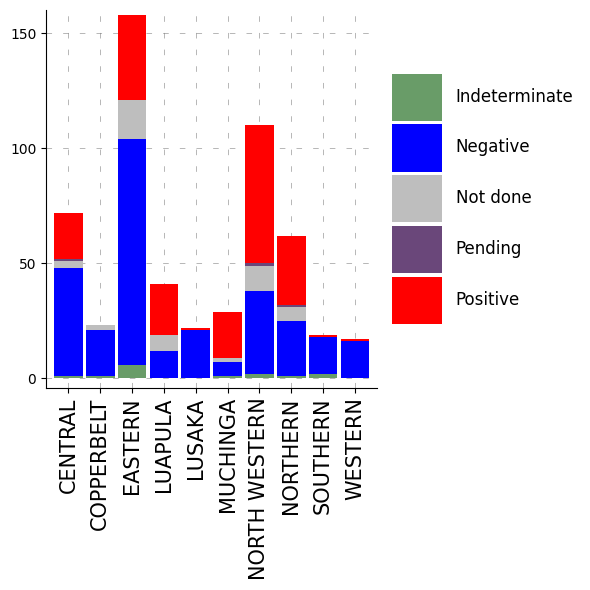

In [189]:
# Ensure that 'grouped' is ready for plotting without re-running all cells
if 'grouped' not in globals():
    # Ensure that measles_lab is correctly mapped
    if 'measles_lab' in globals() and not measles_lab.empty:
        # Replace IgM results with their corresponding categories
        if measles_lab["IgM Results"].dtype != "object":
            measles_lab["IgM Results"] = measles_lab["IgM Results"].map({
                1: "Positive",
                2: "Negative",
                3: "Indeterminate",
                4: "Not done",
                5: "Pending",
                9: "Unknown"
            })

        # Group by 'Province Of Residence' and 'IgM Results' to get counts for each category in each province
        grouped = measles_lab.groupby(["Province Of Residence", "IgM Results"]).size().unstack(fill_value=0)

        # Sort provinces for consistency with the chart image
        grouped = grouped.reindex(index=["CENTRAL", "COPPERBELT", "EASTERN", "LUAPULA", "LUSAKA", "MUCHINGA", "NORTH WESTERN", "NORTHERN", "SOUTHERN", "WESTERN"], fill_value=0)

# Create the bar chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the stacked bar chart with specified colors and set zorder to ensure bars are in front of the gridlines
grouped.plot(kind="bar", stacked=True, ax=ax, color={
    "Indeterminate": "#699c68",  # Green
    "Negative": "#0000ff",       # Blue
    "Not done": "#bebebe",       # Grey
    "Pending": "#6a477a",        # Dark Purple
    "Positive": "#ff0000"        # Red
}, width=0.9, zorder=3)

# Rotate the x-axis labels for better readability and set fontsize for the provinces
plt.xticks(rotation=90, fontsize=15)

# Set y-axis ticks to [0, 50, 100, 150]
ax.set_yticks([0, 50, 100, 150])

# Add some space at the bottom of the y-axis so that 0 is above the x-axis
ax.set_ylim(-4, 160)

# Add labels and legend with adjusted box sizes
plt.xlabel("")
plt.ylabel("")
plt.legend(
    title="", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5), 
    frameon=False, 
    handleheight=4,  # Height of the legend handles
    handlelength=3,  # Length of the legend handles
    fontsize=12,     # Font size of the legend labels
    labelspacing=0.2 # Spacing between legend labels
)

# Add dotted gridlines behind the bars
ax.grid(axis="both", linestyle="--", linewidth=0.4, color="grey", zorder=1)
for line in ax.get_xgridlines() + ax.get_ygridlines():
    line.set_dashes((10, 20))  # (length of dash, length of space)

# Remove unnecessary spines (right and top)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

##### 2. Measles Laboratory Tests Narrative (Automated)

In [190]:
# Precaution for cell independence
measles_lab_copy = measles_lab.copy()

# Replace IgM results with their corresponding categories if not already replaced
if measles_lab_copy['IgM Results'].dtype != 'object':
    measles_lab_copy["IgM Results"] = measles_lab_copy["IgM Results"].map({
        1: "Positive",
        2: "Negative",
        3: "Indeterminate",
        4: "Not done",
        5: "Pending",
        9: "Unknown"
    })

# Extract the year from 'Date specimen received in lab'
year = pd.to_datetime(measles_lab_copy['Date specimen received in lab'], errors='coerce').dt.year.mode()[0]

# 1. Calculate total number of suspected measles cases in the extracted year
total_suspected_measles = len(measles_lab_copy)

# 2. Calculate the total number of specimens tested for measles
measles_specimen = measles_lab_copy[measles_lab_copy['IgM Results'].notna()].shape[0]

# 3. Calculate the total number of positive measles cases
measles_positive = measles_lab_copy[measles_lab_copy['IgM Results'] == 'Positive'].shape[0]

# 4. Calculate positivity rate (PR)
PR_perct = round((measles_positive / measles_specimen) * 100, 1) if measles_specimen > 0 else 0

# Generate the narrative using f-strings
narrative = f"""
• The country has recorded a total of {total_suspected_measles} suspected measles cases in {year}.
• From the {measles_specimen} measles specimen that have been tested, {measles_positive} have been confirmed positive (PR {PR_perct}%).
"""

print(narrative)


• The country has recorded a total of 553 suspected measles cases in 2024.
• From the 553 measles specimen that have been tested, 192 have been confirmed positive (PR 34.7%).



##### 3. Maternal Deaths

In [191]:
# Check the sheets in the Excel workbook
maternal_deaths.keys()

dict_keys(['MD summary', 'MD linelist'])

##### 3.1. Maternal Deaths Summary

In [192]:
# Preview the data in MD Summary
maternal_deaths_summary = maternal_deaths["MD summary"]
maternal_deaths_summary.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Weekly Maternal Death,NaN,NaN,Maternal Death Cumulative,NaN
1,Central,3.0,NaN,Central,36.0
2,Copperbelt,1.0,NaN,Copperbelt,58.0
3,Eastern,1.0,NaN,Eastern,29.0
4,Lusaka,4.0,NaN,Lusaka,88.0
5,Luapula,1.0,NaN,Luapula,20.0
6,Muchinga,2.0,NaN,Muchinga,21.0
7,Northern,NaN,NaN,Northern,38.0
8,North Western,1.0,NaN,North Western,30.0
9,Southern,1.0,NaN,Southern,47.0


In [193]:
# Set the second row as the header - this creates a duplicate
maternal_deaths_summary.columns = maternal_deaths_summary.iloc[0]

# Remove the first row which is now a duplicate
maternal_deaths_summary = maternal_deaths_summary[1:]


# Make a copy to avoid SettingWithCopyWarning
maternal_deaths_summary = maternal_deaths_summary.copy()

# Drop unwanted columns
maternal_deaths_summary.drop(columns=[maternal_deaths_summary.columns[2], maternal_deaths_summary.columns[3]], inplace=True)


In [194]:
# Reset the index for clarity
maternal_deaths_summary.reset_index(drop=True, inplace=True)

In [195]:
maternal_deaths_summary.head(12)

,Weekly Maternal Death,NaN,NaN
0,Central,3.0,36.0
1,Copperbelt,1.0,58.0
2,Eastern,1.0,29.0
3,Lusaka,4.0,88.0
4,Luapula,1.0,20.0
5,Muchinga,2.0,21.0
6,Northern,NaN,38.0
7,North Western,1.0,30.0
8,Southern,1.0,47.0
9,Western,1.0,28.0


In [196]:
# Rename the columns by index
maternal_deaths_summary.rename(columns={
    maternal_deaths_summary.columns[0]: "Province",
    maternal_deaths_summary.columns[1]: "Weekly Maternal Death",
    maternal_deaths_summary.columns[2]: "Maternal Death Cumulative",
}, inplace=True)

In [197]:
# Drop Total row by index
maternal_deaths_summary.drop(index=10, inplace=True)

In [198]:
maternal_deaths_summary.head(20)

,Province,Weekly Maternal Death,Maternal Death Cumulative
0,Central,3.0,36.0
1,Copperbelt,1.0,58.0
2,Eastern,1.0,29.0
3,Lusaka,4.0,88.0
4,Luapula,1.0,20.0
5,Muchinga,2.0,21.0
6,Northern,NaN,38.0
7,North Western,1.0,30.0
8,Southern,1.0,47.0
9,Western,1.0,28.0


##### 3.1.2. Map of Zambian Provinces

In [199]:
zambian_provinces.head(11)

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,25.222638,9.141987,Central,ZM10,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.99949 -12.00267, 30.00002 -12.002..."
1,8.863299,2.588911,Copperbelt,ZM20,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((27.94644 -12.28198, 27.95514 -12.297..."
2,14.657072,4.253458,Eastern,ZM30,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((33.25764 -11.58238, 33.26164 -11.585..."
3,15.141461,4.122920,Luapula,ZM40,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.37374 -8.70908, 29.36164 -8.72298..."
4,10.056553,2.141454,Lusaka,ZM50,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((29.98254 -14.64278, 29.98494 -14.643..."
5,17.987122,7.202235,Muchinga,ZM11,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((32.16182 -9.05766, 32.19187 -9.09042..."
6,22.554858,10.428078,North-Western,ZM70,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((24.15075 -11.02947, 24.15078 -11.029..."
7,15.227700,6.389407,Northern,ZM60,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((30.48184 -8.28098, 30.48544 -8.28408..."
8,13.616327,5.726470,Southern,ZM80,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((27.61591 -15.5235, 27.61987 -15.5241..."
9,16.139219,10.758037,Western,ZM90,None,None,None,Zambia,ZM,2020-01-03,2020-11-24,0000/00/00,"POLYGON ((22.03129 -13.73621, 22.03666 -13.738..."


In [200]:
# Compare spellings of provinces in both data frames
# Provinces in maternal_deaths_summary
print(maternal_deaths_summary['Province'].unique())


['Central' 'Copperbelt' 'Eastern' 'Lusaka' 'Luapula' 'Muchinga' 'Northern'
 'North Western' 'Southern' 'Western']


In [201]:
# Provinces in ADM1_EN column
print(zambian_provinces['ADM1_EN'].unique())

['Central' 'Copperbelt' 'Eastern' 'Luapula' 'Lusaka' 'Muchinga'
 'North-Western' 'Northern' 'Southern' 'Western']


In [202]:
# Standardising the names
maternal_deaths_summary['Province'] = maternal_deaths_summary['Province'].replace({
    "North Western": "North-Western"
})

In [203]:
print(maternal_deaths_summary['Province'].unique())

print(zambian_provinces['ADM1_EN'].unique())

['Central' 'Copperbelt' 'Eastern' 'Lusaka' 'Luapula' 'Muchinga' 'Northern'
 'North-Western' 'Southern' 'Western']
['Central' 'Copperbelt' 'Eastern' 'Luapula' 'Lusaka' 'Muchinga'
 'North-Western' 'Northern' 'Southern' 'Western']


##### 3.1.3. Cumulative Distribution of Maternal Deaths (2024) by Province

In [204]:
# Ensure both dataframes have consistent province naming
map_maternal_deaths = zambian_provinces.merge(maternal_deaths_summary, left_on="ADM1_EN", right_on="Province")

In [205]:
print(map_maternal_deaths.crs)

EPSG:4326


In [206]:
# Re-project the GeoDataFrame to UTM Zone 35S
map_maternal_deaths = map_maternal_deaths.to_crs(epsg=32735)

In [207]:
# Calculate centroids for each polygon in the projected CRS and store them in a new variable
centroids = map_maternal_deaths.geometry.centroid

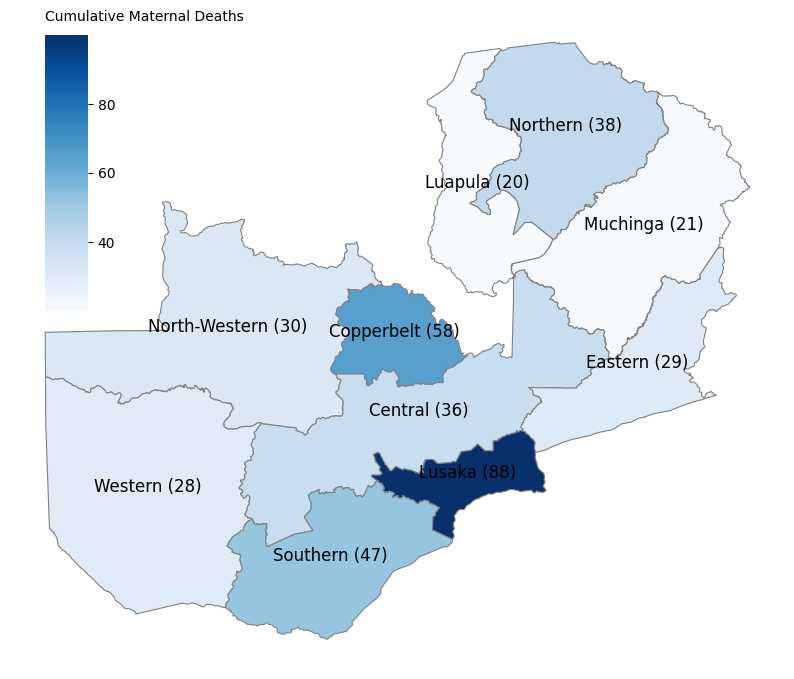

In [208]:
# Step 1: Define a custom colormap with a smooth gradient between specified colors
cmap = "Blues"

# Step 2: Plot the GeoDataFrame with improved boundary clarity
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111)

map_maternal_deaths.plot(column='Maternal Death Cumulative',
                         cmap=cmap,
                         linewidth=0.8,  # Increase the linewidth to make boundaries clearer
                         ax=ax,
                         edgecolor='grey')  # Set edge color to grey for better visibility

# Remove axes
ax.axis('off')

# Annotation for each province's name and value using centroids
centroids = map_maternal_deaths.geometry.centroid
for x, y, province, value in zip(centroids.x, centroids.y, map_maternal_deaths['Province'], map_maternal_deaths['Maternal Death Cumulative']):
    ax.text(x, y, f'{province} ({value:.0f})', fontsize=12, ha='center', color='black')

# New axes for the colorbar
cbar_ax = fig.add_axes([0.16, 0.52, 0.043, 0.23])  # [left, bottom, width, height] (adjust as needed)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=20, vmax=100))
sm._A = []  # This is required to create an empty mappable for the colorbar

# Create the colorbar and set customized ticks
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_ticks([40, 60, 80])  # Show only 40, 60, and 80 as ticks

# Remove the border (spine) around the colorbar
cbar.outline.set_visible(False)

# Position the colorbar label using a text object
fig.text(0.16, 0.765, 'Cumulative Maternal Deaths', fontsize=10, rotation=0, va='center')  # [left, bottom] coordinates, adjust as needed

plt.show()

##### 3.2. Maternal Deaths Linelist

In [209]:
# Preview the data in MD linelist
maternal_deaths_linelist = maternal_deaths["MD linelist"]
maternal_deaths_linelist.head(20)

,Province,Case_ID,Date_of_Death,Date of Notification,Age,Primary Cause of Death,Short Name
0,Copperbelt,MD1,2024-08-11 00:00:00,2024-08-19,25,SUSPECTED ANAESTHETIC DRUG REACTION,Unanticipated complications
1,Copperbelt,MD2,2024-08-14 00:00:00,2024-08-19,31,SUSPECTED ANAESTHETIC DRUG REACTION,Unanticipated complications
2,Copperbelt,MD3,NaN,2024-08-19,21,PERIPARTUM CARDIOMYOPATHY WITH CARDIORENAL SYN...,Non-obstetric complications
3,Copperbelt,MD4,2024-08-16 00:00:00,2024-08-19,27,SEPTIC SHOCK,Hypertensive disorder
4,Western,MD5,2024-05-08 00:00:00,2024-08-19,22,Hypovolemic shock,Obstetric hemorrhage
5,Western,MD6,2024-03-08 00:00:00,2024-08-19,24,Hypovolemic shock,Obstetric haemorrhage
6,Muchinga,MD7,2024-08-16 00:00:00,2024-08-19,26,overwhelming sepsis,Pregnancy-related infection
7,Muchinga,MD8,2024-08-16 00:00:00,2024-08-19,37,hypovoleamic shock,Obstetric haemorrhage
8,North Western,MD9,2024-08-13 00:00:00,2024-08-19,18,SEVERE PNUEMONIA,Non-Obstetric complications
9,Northern,MD10,2024-08-11 00:00:00,2024-08-19,36,MODS,Obstetric haemorrhage


In [210]:
# Clean up typos
# Standardise the 'Short Name' column
maternal_deaths_linelist["Short Name"] = maternal_deaths_linelist["Short Name"].replace({
    "Obstetric hemorrhage": "Obstetric haemorrhage",
    "Non-Obstetric complications": "Non-obstetric complications",
    "Non-obstetric complication": "Non-obstetric complications"
})

##### 3.2.1. Causes of Maternal Deaths

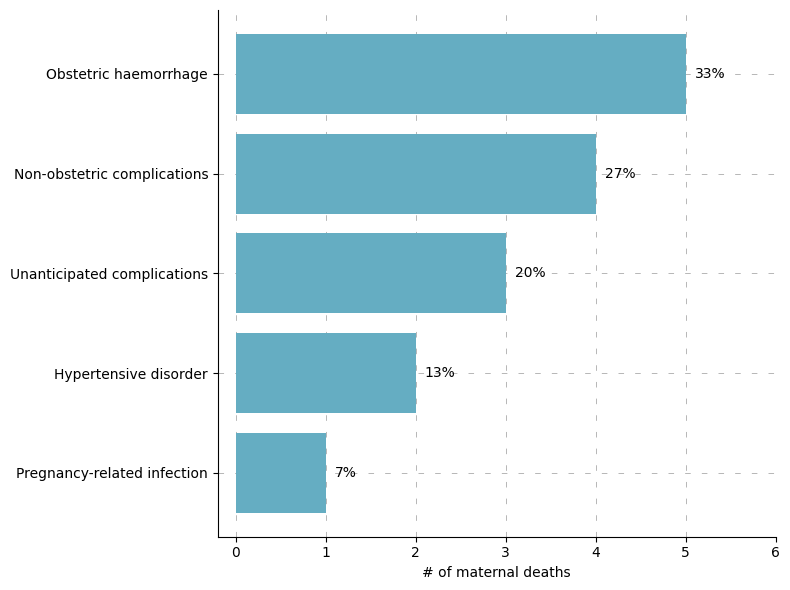

In [211]:
# Bar Chart: Causes of maternal death (Week 34, n=15)
# Counts and percentages after cleaning up typos
counts = maternal_deaths_linelist["Short Name"].value_counts()
percentages = (counts / counts.sum() * 100).round(1)

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot horizontal bars with adjusted bar width, color, and zorder to ensure bars are in front of gridlines
bars = ax.barh(percentages.index, counts, color="#65adc2", height=0.8, zorder=3)

# Annotate each bar with its percentage
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
            f"{percentage:.0f}%", va="center")

# Labels
ax.set_xlabel("# of maternal deaths")

# Slightly offset the y=0 line on x-axis
ax.set_xlim(-0.2, max(counts) + 1)

# Invert y-axis to match your intended layout
ax.invert_yaxis()

# Add dotted gridlines with a lower zorder to ensure they are behind the bars
ax.grid(axis="both", linestyle="--", linewidth=0.4, color="grey", zorder=1)
for line in ax.get_xgridlines() + ax.get_ygridlines():
    line.set_dashes((10, 20))  # (length of dash, length of space)

# Remove unnecessary spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.tight_layout()
plt.show()

##### 3.3. Maternal Deaths Narrative (Automated)

In [212]:
# 1. Calculate the total number of maternal deaths recorded in week 34
# (assuming there's a week column, if not you can modify this accordingly)

week_34_data = maternal_deaths_linelist
n = len(week_34_data)

# 2. Find the top three leading causes of maternal deaths
short_name_counts = maternal_deaths_linelist["Short Name"].value_counts()
top_causes = short_name_counts.head(3).index.tolist()
cond_1, cond_2, cond_3 = top_causes

# 3. Calculate the total number of maternal deaths for the year 2024 using the map data
year = 2024
number = map_maternal_deaths["Maternal Death Cumulative"].sum()

# 4. Get the top three provinces with the highest maternal deaths from the map data
top_provinces = map_maternal_deaths.nlargest(3, "Maternal Death Cumulative")["Province"].tolist()
prov_1, prov_2, prov_3 = top_provinces

# Generate the narrative using f-strings
narrative = f"""
• The bar chart on the left summarizes the causes of deaths of {n:.0f} maternal deaths recorded in week 34.
• {cond_1}, {cond_2}, and {cond_3}, continue to be the leading causes of maternal deaths this year.
• Cumulatively, in {year}, {number:.0f} maternal deaths have been recorded across the country, as depicted on the map.
• Provinces with darker shades ({prov_1}, {prov_2}, and {prov_3}) indicate those with a higher number of reported maternal deaths.
"""

print(narrative)



• The bar chart on the left summarizes the causes of deaths of 15 maternal deaths recorded in week 34.
• Obstetric haemorrhage, Non-obstetric complications, and Unanticipated complications, continue to be the leading causes of maternal deaths this year.
• Cumulatively, in 2024, 395 maternal deaths have been recorded across the country, as depicted on the map.
• Provinces with darker shades (Lusaka, Copperbelt, and Southern) indicate those with a higher number of reported maternal deaths.

